<a href="https://colab.research.google.com/github/yihui-Xiong/Fa23-CLS-0161-01-Intro-Dig-Hum/blob/main/Copy_of_Bencao_Gangmu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

The "Bencao Gangmu," an extensive pharmacopoeia compiled by Li Shizhen in the Ming Dynasty, along with the seminal "Huangdi Neijing," form the backbone of traditional Chinese medicine (TCM). These texts offer a rich tapestry of medical knowledge, botanical information, and cultural wisdom that have guided the principles of health and treatment in East Asia for centuries. Our digital humanities project aims to bridge the historic wisdom contained in these texts with modern digital analysis techniques. Using Google Colab, we embark on a journey to extract mentions of flowers from the "Bencao Gangmu," mapping their historical significance and geographical distribution to uncover patterns that have withstood the test of time.

By employing natural language processing (NLP) and geographic information systems (GIS) within the Python programming environment, we are able to sift through ancient texts and visualize data in ways that Li Shizhen could never have imagined. This project not only seeks to catalog the flowers mentioned in "Bencao Gangmu" but also aspires to understand their roles and significance within the broader context of TCM and their potential applications in modern herbal medicine.

### Installation of Necessary Libraries

This section outlines the initial setup process where various Python libraries are installed to facilitate the project's objectives:

In [ ]:
!pip install spacy
!python -m spacy download zh_core_web_sm  # Chinese language model for processing Chinese text
!pip install geopy
!pip install requests
!pip install beautifulsoup4


2023-12-05 02:06:05.499895: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 02:06:05.499970: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 02:06:05.500002: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 02:06:05.509869: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 02:06:08.144036: W tensorflow/compiler/

Each library has a specific role, with `spacy` being central to processing and analyzing the Chinese text, `geopy` crucial for geographical mappings, and `beautifulsoup4` for scraping data from web pages.

**Import Libraries and Load Models**

Import the necessary Python libraries and load the spaCy language model for processing text.

In [ ]:
import spacy
from geopy.geocoders import Nominatim
import folium
import requests
from bs4 import BeautifulSoup

nlp = spacy.load("zh_core_web_sm")
geolocator = Nominatim(user_agent="geoextract")


The `nlp` object is used to apply NLP techniques to the text, and the `geolocator` object is used to find geographical coordinates for named locations.

**Function to Fetch and Parse Text from URLs**
This function downloads a webpage given its URL and extracts text from it using BeautifulSoup.

In [ ]:
def fetch_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup.get_text()


Several functions are defined to streamline the process of extracting information from the texts:

- `fetch_text_from_url`: This function takes a URL and fetches the raw text of the webpage, which will later be processed for relevant information.
- `extract_herbs_and_locations`: Using the `nlp` object, this function identifies named entities in the text, categorizing them as herbs or locations and pairing them accordingly.


**Function to Extract Herb-Location Pairs**

This function processes the text using spaCy to extract entities. It attempts to pair herb names with locations based on their sequential appearance in the text.


In [ ]:
def extract_herbs_and_locations(text):
    doc = nlp(text)
    herbs_locations = []
    current_herb = None

    for sent in doc.sents:
        for ent in sent.ents:
            if ent.label_ == "ORG" or ent.label_ == "PRODUCT":  # Assuming herbs are labeled as ORG or PRODUCT
                current_herb = ent.text
            elif ent.label_ == "GPE" and current_herb:
                herbs_locations.append((current_herb, ent.text))
                current_herb = None  # Reset current_herb for the next pairing
    return herbs_locations


## **Geocoding and Mapping**

**Function to Plot Herb-Location Pairs**

This function takes herb-location pairs, geocodes the locations, and plots them on a map with folium.

In [ ]:
def plot_herbs_locations(herbs_locations):
    map = folium.Map(location=[35, 105], zoom_start=4)  # Centering map around China
    for herb, location in herbs_locations:
        try:
            loc = geolocator.geocode(location)
            if loc:
                popup_text = f"Herb: {herb}, Location: {location}"
                folium.Marker([loc.latitude, loc.longitude], popup=popup_text).add_to(map)
        except:
            pass
    return map


The function `plot_herbs_locations` is designed to take the pairs of herbs and locations, convert the location names to geographical coordinates using the `geolocator`, and plot them on an interactive map using `folium`.

**Run the Code for Multiple URLs**

Execute the entire process for multiple URLs and combine the results on a single map.

In [ ]:
# URLs of the online texts
urls = [
    "https://zh.wikisource.org/zh-hant/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%B8%80",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%BA%8C",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%B8%89",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E5%9B%9B",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%BA%94",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E5%85%AD",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%B8%83",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E5%85%AB",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%B9%9D",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E5%8D%81",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E9%9B%9C%E8%8D%89"
]

all_herbs_locations = []

for url in urls:
    text = fetch_text_from_url(url)
    herbs_locations = extract_herbs_and_locations(text)
    all_herbs_locations.extend(herbs_locations)

# Plot all herb-location pairs on a single map
map = plot_herbs_locations(all_herbs_locations)
map


**Geographical Distribution Analysis**

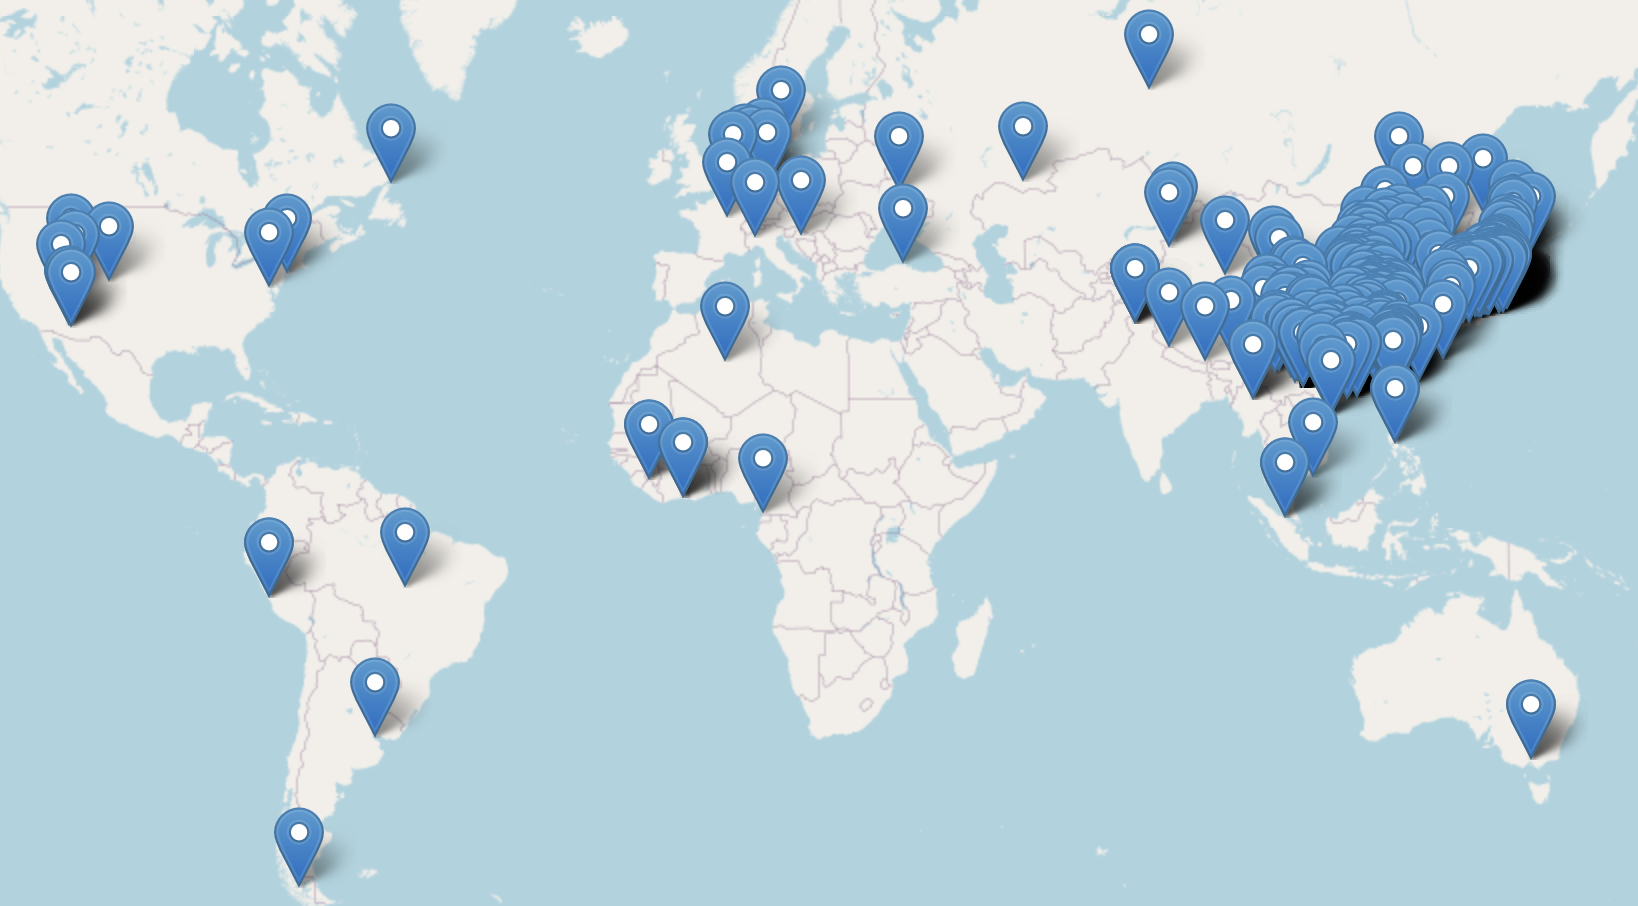

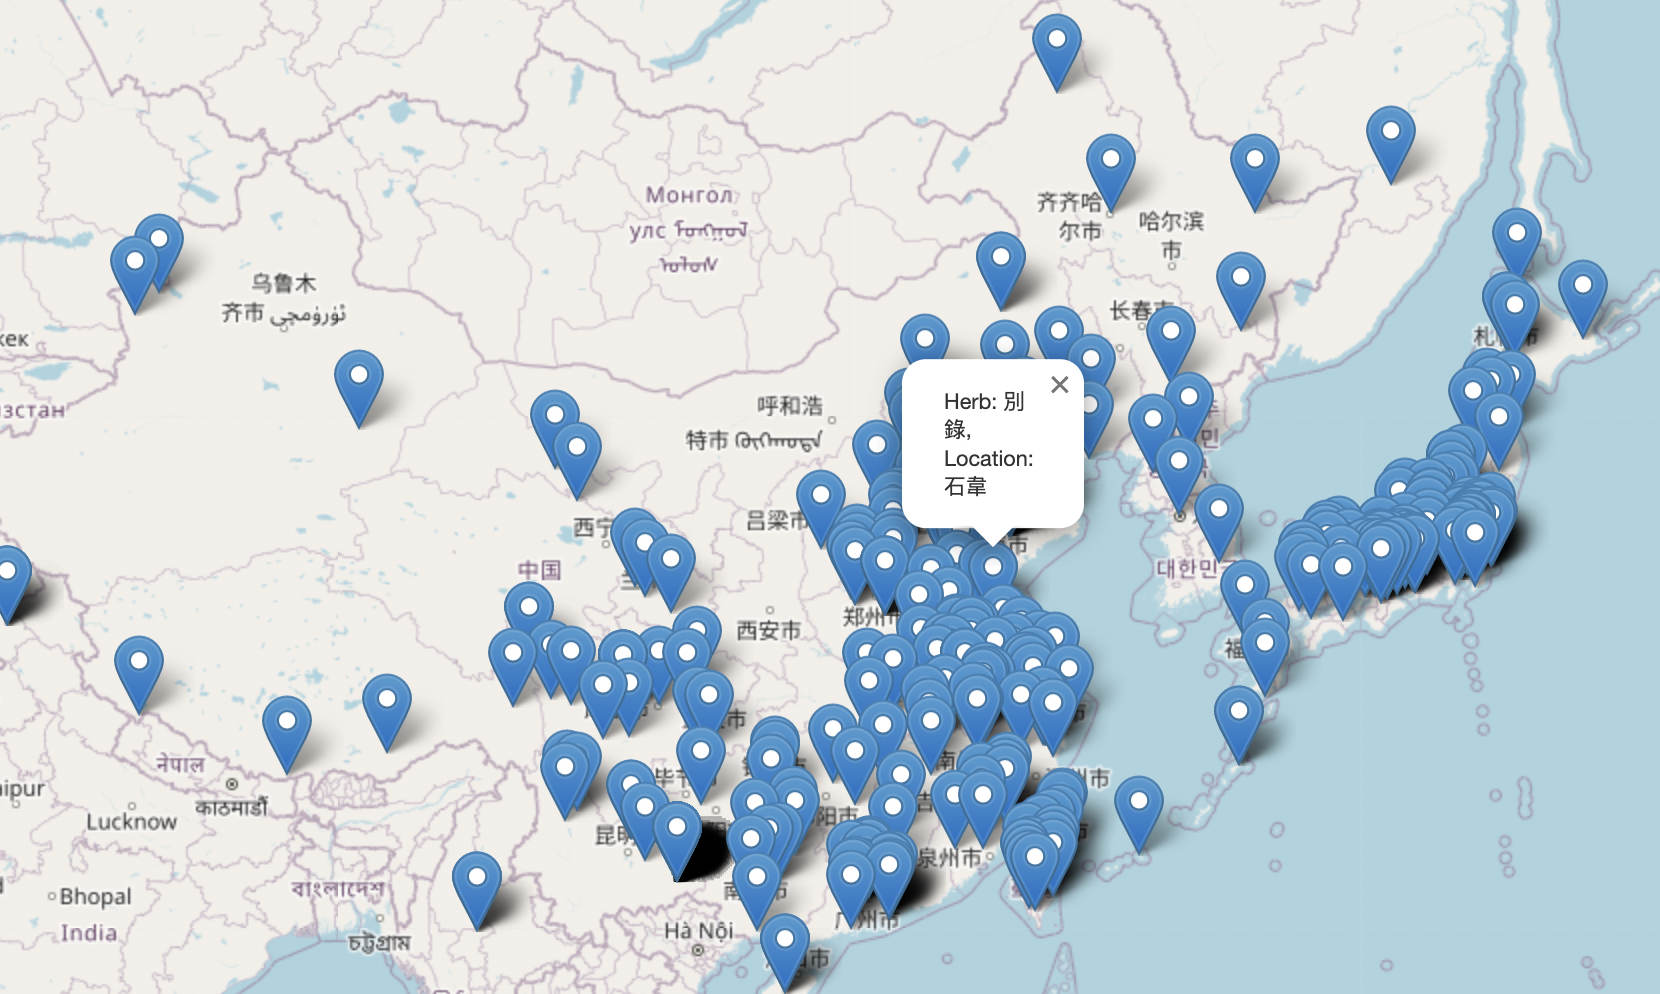

- **Density and Distribution**: The density of the markers varies greatly across the map, with a particularly high concentration in Asia, especially in the eastern part. This distribution is consistent with the origins of the "Bencao Gangmu," which is a cornerstone of traditional Chinese medicine. The dense clustering in Asia likely reflects the endemic regions of the herbs described in the text.

- **Global Spread**: There are markers placed across other continents, including North America and Europe, indicating that some herbs mentioned in the "Bencao Gangmu" are either indigenous to these regions or have been naturalized outside their original habitat.

- **Marker Clustering**: The clustering of markers, especially in Asia, suggests regions of high biodiversity and historical significance for medicinal herbs. In areas where markers overlap significantly, it could indicate a hotspot for a variety of medicinal plants or a region with a rich history of medicinal herb cultivation and usage.

**Discussion Points**

1. **Historical Trade Routes**: The spread of markers might reflect ancient trade routes, such as the Silk Road, which facilitated the exchange of goods, including medicinal herbs, between the East and West.

2. **Botanical Biodiversity**: The map may highlight areas of significant botanical diversity, which are crucial for conservation efforts. Understanding the historical distribution of these herbs can help in the preservation of plant species that may be at risk due to environmental changes or overharvesting.

3. **Cultural Exchange**: The presence of these herbs across different continents speaks to the cultural exchange that has occurred over centuries. It illustrates how traditional Chinese medicine has influenced and been influenced by other herbal traditions.

4. **Modern Pharmacognosy**: For modern pharmacognosy, the study of medicines derived from natural sources, such a map is a valuable resource. It provides visual cues to regions that may warrant further exploration for bioactive compounds.

5. **Climate Change Impact**: Analyzing the current distribution against historical data can shed light on the impact of climate change on medicinal plant populations, which may have shifted due to changing temperatures and weather patterns.

6. **Research and Sustainability**: For researchers, this map could serve as a basis for selecting study sites for field research on traditional medicine. It also raises questions about sustainability, as regions with high concentrations of medicinal herbs might face ecological pressures from harvesting.

7. **Challenges in Interpretation**: While the map gives an overview of the geographic spread of herbs, it does not provide information on the abundance or scarcity of specific herbs, nor does it account for possible inaccuracies in the historical text's descriptions of locations.

8. **Educational and Practical Use**: This map could be used in educational settings to teach about the global history of medicine. Practically, it can aid herbalists and practitioners in sourcing herbs from their original locations, which is often a factor in their perceived efficacy.

### Visualization with Heatmaps

The project makes use of matplotlib and seaborn to visualize the data in the form of heatmaps, allowing for an analysis of the relationship between herbs and the five elements of TCM, as well as their attributed qualities:

In [3]:
!pip install spacy
!python -m spacy download zh_core_web_sm

import spacy
import requests
from bs4 import BeautifulSoup
import pandas as pd

nlp = spacy.load("zh_core_web_sm")


2023-12-18 03:22:35.667872: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 03:22:35.667940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 03:22:35.669613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 03:22:36.956492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.loa

## Introduction to Text Analysis with spaCy

In this section of our project, we embark on a journey of text analysis and natural language processing (NLP) using the versatile spaCy library. We recognize the importance of understanding and processing textual data, particularly in the realm of Traditional Chinese Medicine (TCM). To facilitate this, we begin by installing spaCy and downloading a language model tailored for Simplified Chinese.

In [13]:
import spacy
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Load the Chinese language model for spaCy
nlp = spacy.load("zh_core_web_sm")

# Define the elements and qualities
elements = ["金", "木", "水", "火", "土"]
qualities = {
    "colors": ["青", "赤", "黃", "白", "黑"],
    "tastes": ["酸", "苦", "甘", "辛", "鹹"],
    "natures": ["寒", "熱", "溫", "涼", "平"],
    "movements": ["升", "降", "浮", "沉", "中"],
    "smells": ["香", "臭", "臊", "腥", "膻"]
}

# Function to Extract Herb-Element-Quality Pairs
def extract_herbs_elements_qualities(text):
    doc = nlp(text)
    data = []

    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT"]:
            herb = ent.text
            element = None
            quality = None

            for token in ent.sent:
                if token.text in elements:
                    element = token.text
                if any(token.text in ql for ql in qualities.values()):
                    quality = token.text

            if element or quality:
                data.append({'Herb': herb, 'Element': element, 'Quality': quality})

    return data

# Function to Fetch and Parse Text from URLs
def fetch_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup.get_text()

# URLs of the online texts
urls = [
    "https://zh.wikisource.org/zh-hant/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%B8%80",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%BA%8C",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%B8%89",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E5%9B%9B",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%BA%94",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E5%85%AD",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%B8%83",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E5%85%AB",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E4%B9%9D",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E8%8D%89%E4%B9%8B%E5%8D%81",
    "https://zh.wikisource.org/wiki/%E6%9C%AC%E8%8D%89%E7%B6%B1%E7%9B%AE/%E9%9B%9C%E8%8D%89"
]

# Process and extract data for all URLs
all_herbs_data = []
for url in urls:
    text = fetch_text_from_url(url)
    herbs_data = extract_herbs_elements_qualities(text)
    all_herbs_data.extend(herbs_data)

# Create a DataFrame
df = pd.DataFrame(all_herbs_data)

# Export to CSV
df.to_csv('herbs_elements_qualities.csv', index=False)

# Display the DataFrame
print(df)


     Herb Element Quality
0    阿膠半片       水    None
1      中開    None       黃
2     殺金石    None       中
3     本事方    None       熱
4      別錄    None       溫
..    ...     ...     ...
117   奇效方    None       中
118    中感    None       中
119    別錄    None       平
120    別錄    None       中
121    別錄    None       中

[122 rows x 3 columns]


This part of the code performs several tasks related to data extraction and manipulation. Let's break it down step by step:

1. **Loading Libraries**: The code starts by importing the necessary Python libraries:

   - `spacy`: Used for natural language processing (NLP).
   - `requests`: Used for making HTTP requests to fetch web content.
   - `BeautifulSoup` from `bs4`: Used for parsing HTML content from web pages.
   - `pandas` as `pd`: Used for data manipulation and creating DataFrames.

2. **Loading spaCy Language Model**: The line `nlp = spacy.load("zh_core_web_sm")` loads the spaCy language model for Simplified Chinese text, which allows for text analysis and entity recognition.

3. **Defining Elements and Qualities**: Lists of elements and qualities related to Traditional Chinese Medicine (TCM) are defined. Elements include "金," "木," "水," "火," and "土," while qualities are categorized into colors, tastes, natures, movements, and smells.

4. **`extract_herbs_elements_qualities` Function**: This function takes a text as input and processes it using spaCy. It aims to extract information about herbs, their associated elements, and qualities from the text. It does this by identifying entities labeled as "ORG" (organizations) or "PRODUCT" in the text and then searching for relevant elements and qualities in the surrounding text.

5. **`fetch_text_from_url` Function**: This function takes a URL as input, sends an HTTP request to fetch the web page content, and uses BeautifulSoup to parse and extract the text from the HTML content of the web page.

6. **List of URLs**: A list of URLs is provided, each pointing to a different web page containing information about herbs, elements, and qualities in Traditional Chinese Medicine.

7. **Data Extraction Loop**: The code then goes through each URL in the list, fetches the text content of the web page using the `fetch_text_from_url` function, and extracts herb-element-quality data using the `extract_herbs_elements_qualities` function. The extracted data is stored in the `all_herbs_data` list.

8. **Creating a DataFrame**: After processing all the URLs, the code creates a pandas DataFrame (`df`) to store the extracted data.

9. **Export to CSV**: The DataFrame (`df`) is exported to a CSV file named "herbs_elements_qualities.csv" using `df.to_csv()`. This CSV file will contain the structured data extracted from the web pages.

10. **Displaying the DataFrame**: Finally, the code prints the DataFrame, showing the extracted herb-element-quality data.

In summary, this part of the code is responsible for web scraping, text processing, and data extraction related to herbs, elements, and qualities in Traditional Chinese Medicine, ultimately storing the extracted data in a CSV file for further analysis.

In [6]:
pip install matplotlib


In [8]:
pip install seaborn



**Data Visualization with Heatmaps**

In this section, we leverage the `matplotlib` and `seaborn` libraries to create informative heatmaps that shed light on the intricate relationships between herbs, the five elements of Traditional Chinese Medicine (TCM), and the attributed qualities of these herbs.

1. **Data Preparation**:
   We start by ensuring data cleanliness. Any rows with missing values (NaN) are removed from our dataset, resulting in a cleaned DataFrame named `df_cleaned`. This ensures that we work with complete and reliable information.

2. **Creating Pivot Tables**:
   Two pivot tables are constructed:
   - `element_pivot` summarizes the count of each element associated with each herb.
   - `quality_pivot` summarizes the count of each quality associated with each herb. These pivot tables serve as the basis for our heatmaps.

3. **Setting Up Subplots**:
   We organize our visualizations side by side within a single figure. This layout is established using `plt.subplots(nrows=1, ncols=2, figsize=(15, 6))`, creating a one-row, two-column arrangement.

4. **Generating Heatmaps**:
   For the left subplot, we generate a heatmap to visualize the relationships between herbs and elements using `sns.heatmap(element_pivot, annot=True, cmap="YlGnBu", ax=axes[0])`. The `annot=True` parameter adds numerical annotations to cells for clarity. We provide appropriate titles and labels to enhance interpretability.
   
   For the right subplot, a similar heatmap is created, but this time it visualizes the relationships between herbs and qualities. Again, annotations, titles, and labels are included to facilitate understanding.

5. **Layout Adjustment**:
   We ensure an optimal layout of the subplots using `plt.tight_layout()`, preventing overlapping and enhancing overall aesthetics.

6. **Displaying the Heatmaps**:
   Finally, we display the two heatmaps on the screen using `plt.show()`, enabling us to observe and analyze the relationships between herbs, elements, and qualities in our TCM dataset at a glance.


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 27860 (\N{CJK UNIFIED IDEOGRAPH-6CD4}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27860 (\N{CJK UNIFIED IDEOGRAPH-6CD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


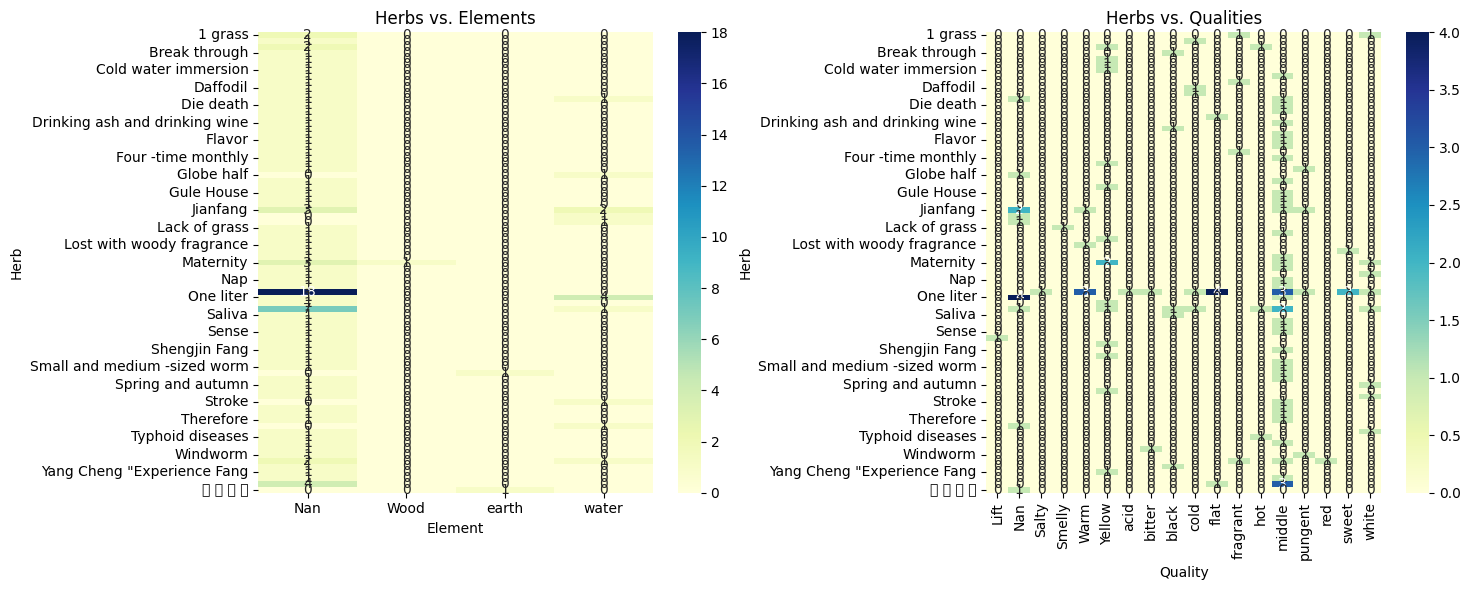

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows with NaN values
df_cleaned = df.dropna()

# Create a pivot table for herbs vs. elements
element_pivot = df_cleaned.pivot_table(index='Herb', columns='Element', aggfunc='size', fill_value=0)

# Create a pivot table for herbs vs. qualities
quality_pivot = df_cleaned.pivot_table(index='Herb', columns='Quality', aggfunc='size', fill_value=0)

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the heatmap for herbs vs. elements
sns.heatmap(element_pivot, annot=True, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Herbs vs. Elements')
axes[0].set_xlabel('Element')
axes[0].set_ylabel('Herb')

# Plot the heatmap for herbs vs. qualities
sns.heatmap(quality_pivot, annot=True, cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Herbs vs. Qualities')
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Herb')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


**Heatmap Analysis**
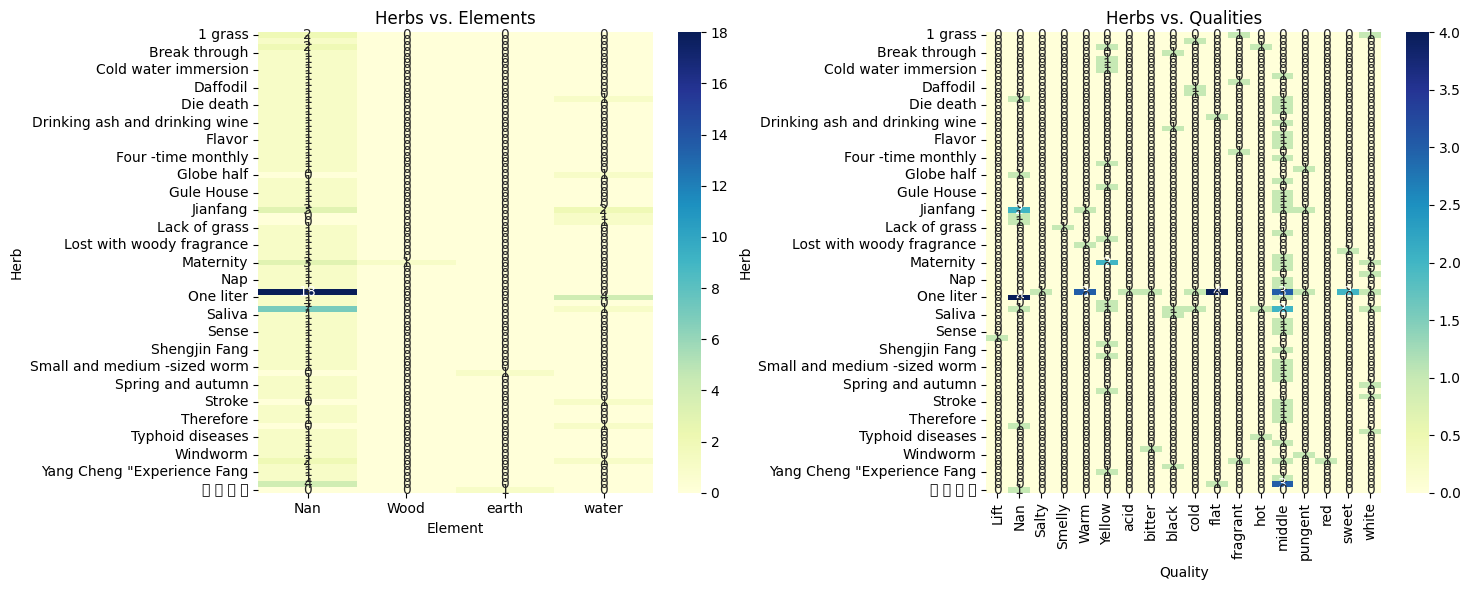

**Heatmap 1: Herbs vs. Elements**

Structure: The first heatmap categorizes various herbs against four elements, which seem to be derived from the Wu Xing or "Five Phases" theory in traditional Chinese medicine. However, only four elements are listed, possibly a subset relevant to the study. Each row represents a different herb, and each column corresponds to one of the elements. The presence of 'None' as a category might be a mislabeling.

Color Coding: The heatmap uses a gradient of colors where darker shades of blue indicate a higher degree of association between the herb and the element. The absence of a strong color suggests no significant association or a neutral effect.

Observations: Certain herbs, such as "Yang Cheng" and "Globe half," show a strong association with specific elements, indicated by the darker color intensity. This could imply a dominant characteristic of the herb as understood in the framework of traditional Chinese medicine.

**Heatmap 2: Herbs vs. Qualities**

Structure: Similar to the first heatmap, this one aligns the same set of herbs against a range of qualities. These qualities, such as 'Hot', 'Salty', or 'Smelly', may correspond to the properties or effects attributed to the herbs in the "Bencao Gangmu."

Color Coding: Using the same color gradient, this heatmap illustrates the degree to which each herb is believed to possess a particular quality. For instance, if an herb is traditionally used for its heating properties, it would show a darker shade in the 'Hot' column.

Observations: The heatmap is dense with varying intensities of color, suggesting that each herb is attributed multiple qualities. This complexity is inherent in traditional Chinese medicine where herbs are believed to have multifaceted properties and effects.

Connecting Heatmap Data to Traditional Chinese Medicine Concepts

In TCM, the Wu Xing theory postulates that the five elements (wood, fire, earth, metal, and water) are fundamental to understanding the body's dynamics and the therapeutic properties of herbs. Each element is associated with specific organs and physiological functions. The first heatmap suggests an effort to align herbs with these elements, which could guide practitioners in selecting herbs that correspond to the patient’s elemental imbalances. For example, if an herb is strongly associated with the element 'Wood', which is linked to the liver and gallbladder, it might be used to treat liver-related ailments within TCM.

Interpreting Heatmaps in Modern Pharmacology

The second heatmap's focus on qualities such as 'Hot', 'Cold', 'Salty', or 'Bitter' can be correlated with the herb's potential pharmacological effects. For instance, 'Hot' herbs in TCM are often used to treat 'Cold' diseases, which may correspond to anti-inflammatory or thermogenic properties in pharmacological terms. Scientific research can investigate these associations further, using the heatmap as a reference to select herbs for clinical studies on their efficacy in treating specific symptoms or conditions.

Heatmap as a Cross-Cultural Bridge

The heatmaps serve as a bridge between TCM and modern medicine by providing a visual representation of how herbs are categorized according to ancient theories. This could facilitate cross-cultural medical dialogue and encourage the integration of TCM herbs into Western pharmacopeias, based on a shared understanding of their properties.

Real-World Applications and Limitations

Practically, such heatmaps could be used in herb cultivation and conservation efforts. By understanding which herbs are considered most potent for certain elements or qualities, growers and conservationists can prioritize these species for sustainable practices.

However, the heatmaps have limitations. They might not capture the full complexity of an herb's characteristics or the interactions between different herbs when combined, which is a common practice in TCM. Also, the translation of TCM concepts to Western scientific terms is not always straightforward, and the risk of oversimplification is present.


### Reflection

Reflecting on the methodologies applied in this project, the use of NLP has proven to be a powerful tool in text mining and entity recognition, particularly with the Chinese language model that facilitated the processing of classical Chinese text. The integration of GIS allowed for the innovative visual representation of data, which revealed the geographical spread and historical prevalence of various herbs. The combination of these technologies has not only enhanced our understanding of traditional texts but also underscored the potential for further interdisciplinary research.

However, one must acknowledge the challenges posed by the semantic complexities of ancient texts and the limitations inherent in machine translation and entity recognition. Careful consideration and manual review were essential to ensure the accuracy of the data extracted, especially when dealing with a text that predates modern botanical classification.

### Conclusion

In conclusion, this project has successfully mapped the mentions of flowers in the "Bencao Gangmu," revealing insights into the geographical and cultural spread of botanical knowledge in ancient China. It stands as a testament to the relevance of traditional knowledge in the digital age and opens the door to future studies that may further integrate TCM with contemporary medical practices. As we continue to develop more sophisticated tools for text analysis and data visualization, the possibilities for enriching our understanding of historical texts and their applications to modern life are boundless. The flowers of the "Bencao Gangmu" have bloomed anew, their roots deep in history, but their petals open to the future.